os.chdir('../src')
os.getcwd()

In [1]:
# import library
import sys
import os
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.preprocessing import OneHotEncoder
import sys
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.core.problem import ElementwiseProblem
from pymoo.factory import (get_crossover, get_mutation, get_sampling,
                           get_termination)
from pymoo.optimize import minimize
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.variable import Real, Integer, Choice, Binary
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.mixed import MixedVariableMating, MixedVariableGA, MixedVariableSampling, MixedVariableDuplicateElimination
from pymoo.optimize import minimize
#from trainers_hkg import Trainers
from trainers import Trainers
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import warnings
import shap
import pickle
from sklearn.decomposition import PCA
import seaborn as sns
from featurizer import featurization_FW2, normalizedata, score,shap_plot,plot,transformPCA_ONE,convertInputs



In [2]:
filename = '/Volumes/Chathura_K/GitHub/ML-MD-Separations/data/generated/1-0-hgk-MD-ActCoeff-processed_Activity.xlsx'

In [3]:
polymers_names = [
    'AR103',
    'AR204',
    'CR61',
    'NAFION',
    'PVAS_BCE',
    'PVAS_RCE',
    'PSbNMP_BCE',
    'PSbNMP_RCE',
    'CEM1',
    'CEM2',
    'CEM3',
    'XLAPn4_9p',
    'XLAPn4_45p'
    
]

polymers_smiles = [
    'CC1CC2CCC3=CC=C(C=C3)C(CC(CC(C)C4=CC=C1C=C4)C5=CC=C2C=C5)CC(CC(CC(C)C6=CC=C(C[N+](C)(C)C)C=C6)C7=CC=C(C[N+](C)(C)C)C=C7)C8=CC=C(C[N+](C)(C)C)C=C8',
    'CC1CC2(C)CC(C)(CC(C)(CC(C)(CC(C)(C)C(=O)OCC[N+](C)(C)C)C(=O)OCC[N+](C)(C)C)C(=O)OCC[N+](C)(C)C)C(=O)OCCOC(=O)C(C)(C)CC(C)(CC(C)(C)C(=O)OCCOC1=O)C(=O)OCCOC2=O',
    'CC1CC2CCC3=CC=C(C=C3)C(CC(CCC4=CC=C1C=C4)C5=CC=C2C=C5)CC(CC(CC(C)C6=CC=C(C=C6)[S](=O)(=O)[O-])C7=CC=C(C=C7)[S](=O)(=O)[O-])C8=CC=C(C=C8)[S](=O)(=O)[O-]',
    '[O-][S](=O)(=O)C(F)(F)C(F)(F)OC(F)(C(F)(F)F)C(F)(F)OC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(OC(F)(F)C(F)(OC(F)(F)C(F)(F)[S](=O)(=O)[O-])C(F)(F)F)C(F)(F)C(F)(F)C(F)(F)C(F)(OC(F)(F)C(F)(OC(F)(F)C(F)(F)[S](=O)(=O)[O-])C(F)(F)F)C(F)(F)F',
    'CC(O)CC(O)CC(O)CC(CC(CC(C)O[S](=O)(=O)[O-])O[S](=O)(=O)[O-])O[S](=O)(=O)[O-]',
    'CC(CC(O)CC(O)CC(CC(O)CC(C)O[S](=O)(=O)[O-])O[S](=O)(=O)[O-])O[S](=O)(=O)[O-]',
    'CC(CC(CC(CC(CC(CC(CC(CC(CCC1=CC=CC=[N+]1C)C2=NC=CC=C2)C3=CC=CC=[N+]3C)C4=NC=CC=C4)C5=CC=CC=[N+]5C)C6=NC=CC=C6)C7=CC=CC=C7)C8=CC=CC=C8)C9=CC=CC=C9',
    'CC(CC(CC(CC(CC(CC(CC(CC(CC(C)C1=NC=CC=C1)C2=[N+](C)C=CC=C2)C3=CC=CC=C3)C4=[N+](C)C=CC=C4)C5=CC=CC=C5)C6=[N+](C)C=CC=C6)C7=CC=CC=C7)C8=CC=CC=N8)C9=NC=CC=C9',
    'CC(CC(CC(CC1(C)CC2(C)CC(C)(C)C(=O)OCCCOCCOC(=O)C(C)(C)CC(C)(CC(C)(C)C(=O)OCCOCCCOC1=O)C(=O)OCCOCCCOC2=O)C(=O)NC(C)(C)C[S]([O-])(=O)=O)C(=O)NC(C)(C)C[S]([O-])(=O)=O)C(=O)NC(C)(C)C[S]([O-])(=O)=O',
    'CC(CC(CC1(C)CC2(C)CC3(C)CC(C)C(=O)OCCOCCCOC(=O)C(C)(C)CC(C)(CC(C)(CC(C)(C)C(=O)OCCCOCCOC1=O)C(=O)OCCCOCCOC2=O)C(=O)OCCCOCCOC3=O)C(=O)NC(C)(C)C[S]([O-])(=O)=O)C(=O)NC(C)(C)C[S]([O-])(=O)=O',
    'CC(CC1(C)CC2(C)CC3(C)CC4(C)CC(C)(C)C(=O)OCCCOCCOC(=O)C(C)CC(C)(CC(C)(CC(C)(CC(C)(C)C(=O)OCCOCCCOC1=O)C(=O)OCCOCCCOC2=O)C(=O)OCCOCCCOC3=O)C(=O)OCCOCCCOC4=O)C(=O)NC(C)(C)C[S]([O-])(=O)=O',
    'CC(C)(C[S]([O-])(=O)=O)NC(=O)CC1C2C3C4CC(=O)OCCOCCOCCOCCOC(=O)CC(C(C(CC(=O)OCCOCCOCCOCCOC1=O)C(=O)OCCOCCOCCOCCOC2=O)C(=O)OCCOCCOCCOCCOC3=O)C(=O)OCCOCCOCCOCCOC4=O',
    'CC(C(C(C(C1C(C)C(=O)OCCOCCOCCOCCOC(=O)C(C)C(C)C(=O)OCCOCCOCCOCCOC1=O)C(=O)NC(C)(C)C[S]([O-])(=O)=O)C(=O)NC(C)(C)C[S]([O-])(=O)=O)C(=O)NC(C)(C)C[S]([O-])(=O)=O)C(=O)NC(C)(C)C[S]([O-])(=O)=O'
    
]

polymers_dict_ = dict(zip(polymers_names, polymers_smiles))

#polymers_dict_

In [4]:
# Load data, encode the ions, molecules
(data01_MorganDescr, ohe_ions01_MorganDescr, fingerprints01_MorganDescr) = featurization_FW2(
    filename, polymers_names, polymers_smiles, descriptorType = 'MorganDescr', approach = 'METHODX_A0')

In [5]:
X = data01_MorganDescr.iloc[:,:-1]
Y = data01_MorganDescr.iloc[:, -1]

## A0 -No transfomation

In [6]:
# split and transfrom dataset
# if transformation of input is desired, set property = 'X' and transform = True
# if transformation of output is desired, set property = 'Y' and transform = True
# set splitRatio = 0.2 or 0.1, state = 0
(X01_MF_train, X01_MF_test, y01_MF_train, y01_MF_test) = normalizedata(X, Y, 
                                                        splitRatio = 0.2, state = 0,transform = False, property = 'X')

print(f"X01_train, X01_test, y01_train, and y01_test has shapes of {X01_MF_train.shape}, {X01_MF_test.shape}, {y01_MF_train.shape}, and {y01_MF_test.shape}")

X01_train, X01_test, y01_train, and y01_test has shapes of (64, 153), (16, 153), (64,), and (16,)


## A1 - PCA apply to all the input features

In [7]:
# PCA transform

pca_X01_MF_train_ALL, pca_X01_MF_test_ALL = convertInputs(X01_MF_train, X01_MF_test,fingerprints01_MorganDescr, type = 'All')
print(f"pca_X01_MF_train_ALL and pca_X01_MF_test_ALL has shapes of {pca_X01_MF_train_ALL.shape}, and {pca_X01_MF_test_ALL.shape}, respectively.")

pca_X01_MF_train_ALL and pca_X01_MF_test_ALL has shapes of (64, 10), and (16, 10), respectively.


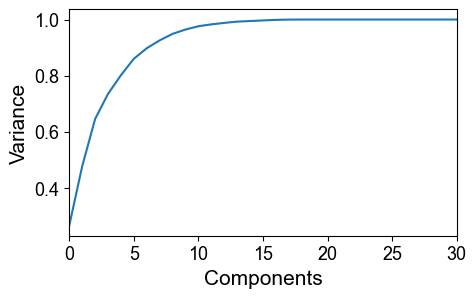

In [8]:
transformPCA_ONE(x = X, length = fingerprints01_MorganDescr.shape[1], type = 'ALL')

## A2 - PCA applied only to the polymer fingerprints

In [9]:
# PCA transform
pca_X01_MF_train_ALL, pca_X01_MF_test_ALL = convertInputs(X01_MF_train, X01_MF_test,fingerprints01_MorganDescr, type = 'All')
pca_X01_MF_train_MDFP, pca_X01_MF_test_MDFP = convertInputs(X01_MF_train, X01_MF_test,fingerprints01_MorganDescr,type = 'MDFP')
print(f"pca_X01_MF_train_MDFP, pca_X01_MF_test_MDFP, y01_train, and y01_test has shapes of {pca_X01_MF_train_MDFP.shape}, and {pca_X01_MF_test_MDFP.shape}, respectively.")

pca_X01_MF_train_MDFP, pca_X01_MF_test_MDFP, y01_train, and y01_test has shapes of (64, 35), and (16, 35), respectively.


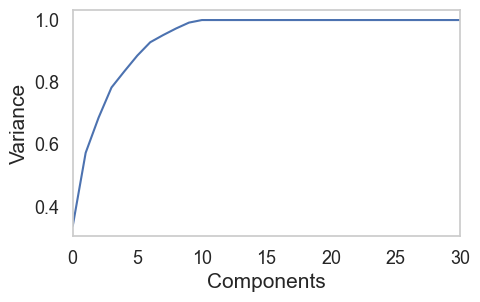

In [10]:
transformPCA_ONE(x = X, length = fingerprints01_MorganDescr.shape[1], type = 'MDFP')

In [11]:
# Load train and test data (A0 / A1 /A2)
X_train =X01_MF_train
y_train =y01_MF_train
X_test =X01_MF_test
y_test =y01_MF_test

## ML models
## Hyperpaermater optimization
## SVR

In [15]:
class svrModel(ElementwiseProblem):
    def __init__(self, X_train, X_test, y_train, y_test, **kwargs):
        vars = {
            "C": Real(bounds = (0.1, 100)),
            "epsilon": Real(bounds = (0.01, 20.0))
        }

        super().__init__(vars=vars, n_obj=3, n_ieq_constr=0, **kwargs)

        self.trainer = Trainers()

        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test


    def _evaluate(self, X, out, *arg, **kwargs):

        scores = self.trainer.trainSVR_SingleOutput(h_params= X,
                                       X_train=self.X_train,
                                       X_test=self.X_test,
                                       y_train=self.y_train,
                                       y_test=self.y_test,
                                       folds=5)

        out['F'] = [-1 * scores[0], scores[1], -1 * scores[2]]


class Solvers(ElementwiseProblem):
    def __init__(self):
        super(ElementwiseProblem, self).__init__()

    def svrSolver(self, X_train, X_test, y_train, y_test):

        problem = svrModel(X_train, X_test, y_train, y_test)

        algorithm = NSGA2(  
                        pop_size=2,
                        sampling=MixedVariableSampling(),
                        mating=MixedVariableMating(eliminate_duplicates=MixedVariableDuplicateElimination()),
                        eliminate_duplicates=MixedVariableDuplicateElimination(),
                        n_offsprings=4
                        )

        res = minimize(problem,
                       algorithm,
                       termination=("n_gen", 500),
                       seed=1,
                       save_history=True,
                       verbose=True)

        return res

    def get_best(self, res):

        for i in range(len(res.F)):

            w_metric = -1 * res.F[:, 0] - res.F[:, 1] - res.F[:, 2]

            if w_metric[i] == max(w_metric[:]):
                best_x = res.X[i]
                best_f = res.F[i]

        return best_x, best_f

In [16]:
solver = Solvers()
trainer = Trainers()

res = solver.svrSolver(X_train=X_train,
                X_test=X_test,
                y_train=y_train,
                y_test=y_test)

h_params, best_F = solver.get_best(res)

score = trainer.trainSVR_SingleOutput(h_params=h_params,
                        X_train=X_train,
                        X_test=X_test,
                        y_train=y_train,
                        y_test=y_test,
                        folds=5)



{'C': 41.76049826978715, 'epsilon': 0.012286352598724284}
{'C': 72.0604168948716, 'epsilon': 6.053628126910477}
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |        2 |      1 |             - |             -
{'C': 72.0604168948716, 'epsilon': 0.3009392332060581}
{'C': 41.76049826978715, 'epsilon': 6.069687443092774}
{'C': 52.864167896745705, 'epsilon': 5.949025304005646}
{'C': 72.0604168948716, 'epsilon': 0.5072755760661412}
     2 |        6 |      2 |  1.0000000000 |         ideal
{'C': 41.76049826978715, 'epsilon': 1.7926026381996865}
{'C': 66.10316060065897, 'epsilon': 0.3009392332060581}
{'C': 72.0604168948716, 'epsilon': 0.0298703801962584}
{'C': 78.65931170889557, 'epsilon': 0.013811636386431708}
     3 |       10 |      2 |  0.0444953091 |         ideal
{'C': 72.0604168948716, 'epsilon': 0.02662015958366465}
{'C': 68.7465760319803, 'epsilon': 1.48116956364623}
{'C': 72.44385594600656, 'epsilon': 0.13586977348907847}
{'C': 72.0604168948716, 'epsilon': 0.026

    29 |      114 |      2 |  0.0717026189 |         ideal
{'C': 76.2907283111788, 'epsilon': 0.24637423030068895}
{'C': 72.60875464460473, 'epsilon': 0.05388940455006598}
{'C': 72.60875464460473, 'epsilon': 0.25080992392214435}
{'C': 72.60875464460473, 'epsilon': 0.011107216309909122}
    30 |      118 |      2 |  0.000000E+00 |             f
{'C': 72.8706804810132, 'epsilon': 0.04687970554564683}
{'C': 72.60875464460473, 'epsilon': 0.24608044365827664}
{'C': 72.60875464460473, 'epsilon': 0.04719376746404537}
{'C': 72.60875464460473, 'epsilon': 0.024874651463490095}
    31 |      122 |      2 |  2.728353E+02 |         ideal
{'C': 72.86787061182311, 'epsilon': 0.04687970554564683}
{'C': 68.00072829022153, 'epsilon': 0.04687970554564683}
{'C': 72.61156451379482, 'epsilon': 0.04687970554564683}
{'C': 68.25442036633676, 'epsilon': 0.04687970554564683}
    32 |      126 |      2 |  1.9335987348 |         ideal
{'C': 73.10670791935776, 'epsilon': 0.03388027766990177}
{'C': 72.8706804810132,

{'C': 75.436630459075, 'epsilon': 0.041946747940243626}
    58 |      230 |      2 |  0.000000E+00 |             f
{'C': 75.45600084569266, 'epsilon': 2.8994201639631316}
{'C': 75.52990491477155, 'epsilon': 0.04372189413822966}
{'C': 74.18210860597819, 'epsilon': 0.09685323841318164}
{'C': 80.5790465854672, 'epsilon': 1.8628428096916059}
    59 |      234 |      2 |  0.0052294071 |         ideal
{'C': 74.19622870632881, 'epsilon': 0.03475386392614858}
{'C': 74.11190538385935, 'epsilon': 0.9114679636955456}
{'C': 95.0858863542477, 'epsilon': 0.1744936419597738}
{'C': 75.60010813689038, 'epsilon': 0.03974142728528705}
    60 |      238 |      2 |  0.0266207297 |         ideal
{'C': 77.8419049232732, 'epsilon': 0.1145645133334883}
{'C': 83.52430112345186, 'epsilon': 0.040068642294543}
{'C': 70.8482213854366, 'epsilon': 3.14724325523105}
{'C': 95.18697463667738, 'epsilon': 0.1744936419597738}
    61 |      242 |      2 |  0.1306646991 |         ideal
{'C': 83.20330755147658, 'epsilon': 0.0

{'C': 85.98873017313237, 'epsilon': 1.057838529960523}
{'C': 99.90935337529525, 'epsilon': 1.9512050857708443}
{'C': 99.9977699590097, 'epsilon': 0.036484311174796544}
    88 |      350 |      2 |  0.000000E+00 |             f
{'C': 99.99863674555894, 'epsilon': 0.043437782778735404}
{'C': 98.2649547258421, 'epsilon': 0.036613071992675134}
{'C': 99.98058566413285, 'epsilon': 0.7860046865963715}
{'C': 99.9365042310152, 'epsilon': 0.03639009589587948}
    89 |      354 |      2 |  0.0028118986 |         ideal
{'C': 99.99360899087945, 'epsilon': 0.043437782778735404}
{'C': 99.92704453061526, 'epsilon': 0.0363589032319515}
{'C': 99.92796551670025, 'epsilon': 0.02212028255702258}
{'C': 91.11981103452382, 'epsilon': 0.038603444454945464}
    90 |      358 |      2 |  1.044215E+01 |         ideal
{'C': 99.99398556271592, 'epsilon': 0.043437782778735404}
{'C': 99.99863674555894, 'epsilon': 1.6091169931149938}
{'C': 99.9982601085368, 'epsilon': 0.043437782778735404}
{'C': 99.99364001677452, 'ep

   117 |      466 |      2 |  0.000000E+00 |             f
{'C': 44.31175672712963, 'epsilon': 0.059242777455890974}
{'C': 50.78669547199756, 'epsilon': 0.04829537267703114}
{'C': 57.65496421946571, 'epsilon': 0.20707763838842846}
{'C': 78.39750407143043, 'epsilon': 0.21801907392536274}
   118 |      470 |      2 |  7.517996E+01 |         ideal
{'C': 47.99519078521518, 'epsilon': 0.2853725033766329}
{'C': 49.96454136454035, 'epsilon': 0.04829537267703114}
{'C': 50.677240693929996, 'epsilon': 1.6980653580293616}
{'C': 50.78568572632419, 'epsilon': 0.04829537267703114}
   119 |      474 |      2 |  0.9940537208 |         ideal
{'C': 47.98871653343542, 'epsilon': 0.2853725033766329}
{'C': 52.13645632157562, 'epsilon': 0.2853725033766329}
{'C': 49.653676228476485, 'epsilon': 0.04829537267703114}
{'C': 49.96454136454035, 'epsilon': 0.3261786398405873}
   120 |      478 |      2 |  0.0027997988 |         ideal
{'C': 51.32048388601261, 'epsilon': 2.655475188459499}
{'C': 43.845414814991386, '

{'C': 55.13672951450998, 'epsilon': 0.02980346009658923}
{'C': 70.59055510596198, 'epsilon': 0.04690647337163356}
{'C': 55.13672951450998, 'epsilon': 0.21609182698083917}
   147 |      586 |      2 |  0.9712157305 |         ideal
{'C': 52.990373320735564, 'epsilon': 0.18484114313923217}
{'C': 45.984153495868675, 'epsilon': 0.050407117509629354}
{'C': 55.13672951450998, 'epsilon': 0.03632648178050227}
{'C': 55.09537415387487, 'epsilon': 0.013046401572169103}
   148 |      590 |      2 |  0.000000E+00 |             f
{'C': 55.41878568906821, 'epsilon': 0.20771635016148499}
{'C': 60.85029163735561, 'epsilon': 0.21609182698083917}
{'C': 51.802096637197984, 'epsilon': 0.05709612291492537}
{'C': 55.13672951450998, 'epsilon': 0.04004717183464447}
   149 |      594 |      2 |  0.000000E+00 |             f
{'C': 41.949392461738356, 'epsilon': 0.14208505985647918}
{'C': 69.46643669972735, 'epsilon': 0.048715277255135386}
{'C': 54.74501500905752, 'epsilon': 0.18190820891870543}
{'C': 55.136729514

{'C': 56.574513150224114, 'epsilon': 0.04789792527229457}
{'C': 48.95124198776078, 'epsilon': 0.4566863520401385}
{'C': 56.916343409874656, 'epsilon': 0.3592106398842392}
   177 |      706 |      2 |  4.8456218094 |         ideal
{'C': 59.33417134965175, 'epsilon': 0.04789792527229457}
{'C': 66.95911785302006, 'epsilon': 0.04789792527229457}
{'C': 62.551626190744386, 'epsilon': 0.018051175824905452}
{'C': 55.67506886772203, 'epsilon': 0.04789792527229457}
   178 |      710 |      2 |  5.8686644188 |         ideal
{'C': 57.307223549760494, 'epsilon': 0.04789792527229457}
{'C': 59.83160308446282, 'epsilon': 0.010980261661529177}
{'C': 65.0567852578677, 'epsilon': 0.4828865346494961}
{'C': 64.87869331874212, 'epsilon': 0.04789792527229457}
   179 |      714 |      2 |  1.0000000000 |         ideal
{'C': 53.198630484375016, 'epsilon': 1.0607476197791872}
{'C': 54.61480475164534, 'epsilon': 0.04789792527229457}
{'C': 65.67875129595188, 'epsilon': 0.04789792527229457}
{'C': 60.56029203890406

{'C': 67.07163265143409, 'epsilon': 0.08541253367252936}
{'C': 73.57598476948661, 'epsilon': 0.01607483969769585}
{'C': 73.48564858674523, 'epsilon': 0.04304057163429403}
   207 |      826 |      2 |  0.000000E+00 |             f
{'C': 66.757550503595, 'epsilon': 0.4209213774395079}
{'C': 73.4335057530895, 'epsilon': 0.04528649598424161}
{'C': 73.79973073458432, 'epsilon': 0.33283418097004336}
{'C': 67.12377548508981, 'epsilon': 0.04528649598424161}
   208 |      830 |      2 |  0.000000E+00 |             f
{'C': 66.54068060708835, 'epsilon': 0.6520955274747513}
{'C': 75.91252066437522, 'epsilon': 0.04528649598424161}
{'C': 70.69691194454867, 'epsilon': 2.6460462674767657}
{'C': 66.80883031558957, 'epsilon': 0.022101906160715674}
   209 |      834 |      2 |  1.0000000000 |         ideal
{'C': 73.5591067024538, 'epsilon': 0.04528649598424161}
{'C': 75.92939873140803, 'epsilon': 0.07611666569213907}
{'C': 75.15138152026854, 'epsilon': 1.0074813385713537}
{'C': 52.32773544087769, 'epsilo

   236 |      942 |      2 |  0.000000E+00 |             f
{'C': 88.84109161220421, 'epsilon': 3.302623208574844}
{'C': 94.14326915560616, 'epsilon': 0.7957386953457113}
{'C': 89.24119239671533, 'epsilon': 0.0425354783474707}
{'C': 82.34061665380938, 'epsilon': 0.048456922444035606}
   237 |      946 |      2 |  0.000000E+00 |             f
{'C': 90.53270656232361, 'epsilon': 0.0169374149139442}
{'C': 93.9118438633678, 'epsilon': 0.048456922444035606}
{'C': 89.72690335002099, 'epsilon': 0.04262750561674361}
{'C': 89.27608726641147, 'epsilon': 0.013433385024277399}
   238 |      950 |      2 |  0.000000E+00 |             f
{'C': 88.80716318280965, 'epsilon': 0.20363482635753863}
{'C': 92.56097564947888, 'epsilon': 0.6519869345435212}
{'C': 83.1388381291291, 'epsilon': 0.04249306619854613}
{'C': 90.9396462416703, 'epsilon': 0.014678565439208029}
   239 |      954 |      2 |  0.000000E+00 |             f
{'C': 88.80619674250808, 'epsilon': 0.017067943832993277}
{'C': 89.23443416665836, 'e

   265 |     1058 |      2 |  0.7696354297 |         ideal
{'C': 99.79524003772424, 'epsilon': 0.01046794016117987}
{'C': 99.09075729175633, 'epsilon': 0.13720028754902033}
{'C': 98.07036820164748, 'epsilon': 0.4946379259359557}
{'C': 99.47355147983998, 'epsilon': 0.033729681400764266}
   266 |     1062 |      2 |  0.0220749938 |         ideal
{'C': 99.47355147983998, 'epsilon': 0.02510838096792055}
{'C': 99.59520059369268, 'epsilon': 0.028181032208468494}
{'C': 99.09075729175633, 'epsilon': 0.010554144204180299}
{'C': 99.18396769640302, 'epsilon': 3.350003631661246}
   267 |     1066 |      2 |  0.000000E+00 |             f
{'C': 99.09075729175633, 'epsilon': 0.4400142364346916}
{'C': 99.47355147983998, 'epsilon': 0.033833518659367554}
{'C': 99.86191486043666, 'epsilon': 0.1361058015351419}
{'C': 96.5541415566897, 'epsilon': 2.3847229803990455}
   268 |     1070 |      2 |  0.000000E+00 |             f
{'C': 99.91752636579858, 'epsilon': 0.03843040242832651}
{'C': 94.247225958146, 'ep

{'C': 99.80059229760575, 'epsilon': 0.039465737947835575}
{'C': 99.28334709875872, 'epsilon': 0.051347482117009825}
   294 |     1174 |      2 |  0.0463633278 |         ideal
{'C': 99.79549473937523, 'epsilon': 1.0806504332584164}
{'C': 99.28334709875872, 'epsilon': 3.8280974998130626}
{'C': 96.43442669050796, 'epsilon': 0.0327088718484339}
{'C': 99.41663706283197, 'epsilon': 0.05164484880701528}
   295 |     1178 |      2 |  0.000000E+00 |             f
{'C': 99.24809296846287, 'epsilon': 0.8335386889455699}
{'C': 95.4865013420112, 'epsilon': 0.051327567813508244}
{'C': 97.52846247509743, 'epsilon': 0.5000798039614902}
{'C': 99.82415471698143, 'epsilon': 0.09145833197257575}
   296 |     1182 |      2 |  0.000000E+00 |             f
{'C': 99.28334709875872, 'epsilon': 0.19312028569954495}
{'C': 95.28803178358675, 'epsilon': 0.030432619954974184}
{'C': 99.87698428941081, 'epsilon': 0.051348028268734545}
{'C': 99.88856573014938, 'epsilon': 0.05164294000708473}
   297 |     1186 |      2

{'C': 89.99948411760431, 'epsilon': 0.02280713956895859}
{'C': 99.54546415711313, 'epsilon': 0.023322626578424363}
{'C': 99.66612138908121, 'epsilon': 0.0402247116725026}
   323 |     1290 |      2 |  0.0236646359 |         ideal
{'C': 99.81370641101371, 'epsilon': 0.02518582184889447}
{'C': 99.96451826873721, 'epsilon': 0.04029404733366921}
{'C': 99.97013391951091, 'epsilon': 0.5746898757662019}
{'C': 99.66612138908121, 'epsilon': 0.035816419807436044}
   324 |     1294 |      2 |  0.0121012753 |         ideal
{'C': 95.66240772823006, 'epsilon': 0.6668802020460769}
{'C': 99.82782702262651, 'epsilon': 0.03588575546860265}
{'C': 99.96006076782425, 'epsilon': 0.04029404733366921}
{'C': 99.23775374947918, 'epsilon': 0.04029404733366921}
   325 |     1298 |      2 |  0.0029094506 |         ideal
{'C': 94.52577027008056, 'epsilon': 0.11916365780272622}
{'C': 99.95996036461291, 'epsilon': 0.040247745217948314}
{'C': 99.97983149016926, 'epsilon': 0.03588575546860265}
{'C': 99.59668621587832, 

   352 |     1406 |      2 |  0.000000E+00 |             f
{'C': 82.02854714321181, 'epsilon': 0.8663029745990245}
{'C': 87.38765565274448, 'epsilon': 0.045074191818699184}
{'C': 80.69798949695087, 'epsilon': 0.3420264244379023}
{'C': 80.02280320908204, 'epsilon': 0.050359811707820966}
   353 |     1410 |      2 |  0.000000E+00 |             f
{'C': 75.51619763369897, 'epsilon': 0.05016896714386094}
{'C': 87.06435616384213, 'epsilon': 0.03626688766129661}
{'C': 80.69648716219544, 'epsilon': 1.8593359365637787}
{'C': 80.69753725931221, 'epsilon': 0.05016896714386094}
   354 |     1414 |      2 |  0.000000E+00 |             f
{'C': 80.66002420954433, 'epsilon': 0.045265036382659204}
{'C': 85.20041297661622, 'epsilon': 0.045488416357939015}
{'C': 80.69667367971442, 'epsilon': 0.034256082742572525}
{'C': 77.82168010849634, 'epsilon': 0.04307939469891481}
   355 |     1418 |      2 |  0.2090905770 |         ideal
{'C': 81.18878867341267, 'epsilon': 0.050323730036296914}
{'C': 74.61632704017

{'C': 99.88407455682082, 'epsilon': 0.04097711677154506}
   382 |     1526 |      2 |  0.000000E+00 |             f
{'C': 96.32722847792654, 'epsilon': 0.46652193177247964}
{'C': 99.88407455682082, 'epsilon': 0.4471268296391837}
{'C': 98.093972466335, 'epsilon': 0.19668378890598176}
{'C': 94.37143332843358, 'epsilon': 0.043813651109463385}
   383 |     1530 |      2 |  0.9405243720 |         ideal
{'C': 90.07609445807797, 'epsilon': 0.8204941510023522}
{'C': 91.13009605076586, 'epsilon': 0.02328082257732413}
{'C': 99.99225566901758, 'epsilon': 0.3452949122231302}
{'C': 98.01730576501915, 'epsilon': 0.032509534532198375}
   384 |     1534 |      2 |  0.000000E+00 |             f
{'C': 98.093972466335, 'epsilon': 3.1404985214721606}
{'C': 99.88407455682082, 'epsilon': 0.034486149888838885}
{'C': 94.09328994850013, 'epsilon': 0.5453791508681868}
{'C': 96.94499495164992, 'epsilon': 0.10523065516622096}
   385 |     1538 |      2 |  0.000000E+00 |             f
{'C': 93.58642657477853, 'eps

{'C': 99.99403014743972, 'epsilon': 0.04269037674010279}
   412 |     1646 |      2 |  0.000000E+00 |             f
{'C': 99.9989700816531, 'epsilon': 0.042800048340111745}
{'C': 99.99403014743972, 'epsilon': 0.011491478404338968}
{'C': 99.9807164810213, 'epsilon': 0.5509079979711867}
{'C': 99.99409250901066, 'epsilon': 0.031735195236813396}
   413 |     1650 |      2 |  0.000000E+00 |             f
{'C': 94.19283506146516, 'epsilon': 0.03550531793436963}
{'C': 98.99410096241638, 'epsilon': 0.042800048340111745}
{'C': 95.67574192186281, 'epsilon': 0.01531286582130064}
{'C': 87.40721005698086, 'epsilon': 0.03557299763176412}
   414 |     1654 |      2 |  0.000000E+00 |             f
{'C': 99.99698621635602, 'epsilon': 2.439900140708857}
{'C': 99.99899072121214, 'epsilon': 1.3107442767874418}
{'C': 99.97947805296664, 'epsilon': 0.0353837299009419}
{'C': 88.84565111382685, 'epsilon': 0.47452650455561207}
   415 |     1658 |      2 |  0.000000E+00 |             f
{'C': 99.99403014743972, '

{'C': 93.11872698993344, 'epsilon': 0.028630622995698275}
   441 |     1762 |      2 |  1.577200E+01 |         ideal
{'C': 87.62122789445694, 'epsilon': 0.042906226835529276}
{'C': 97.3501381897496, 'epsilon': 0.042906226835529276}
{'C': 84.17322876239801, 'epsilon': 0.7759361023416276}
{'C': 97.1786977647837, 'epsilon': 0.042906226835529276}
   442 |     1766 |      2 |  0.000000E+00 |             f
{'C': 97.86422100587858, 'epsilon': 0.042906226835529276}
{'C': 85.88371637450346, 'epsilon': 0.042906226835529276}
{'C': 97.85221298206271, 'epsilon': 0.08007386689889037}
{'C': 87.71993189794156, 'epsilon': 0.4569002219852799}
   443 |     1770 |      2 |  0.7998186793 |         ideal
{'C': 94.55016702604404, 'epsilon': 0.042906226835529276}
{'C': 93.40359616492275, 'epsilon': 0.042906226835529276}
{'C': 96.04301044464832, 'epsilon': 0.042906226835529276}
{'C': 88.04944882458122, 'epsilon': 0.54708307221787}
   444 |     1774 |      2 |  0.5702851241 |         ideal
{'C': 97.499882153484

{'C': 94.15956611570438, 'epsilon': 0.24336163429877022}
{'C': 97.89370433972786, 'epsilon': 0.17428831615137952}
   471 |     1882 |      2 |  6.572735E+01 |         ideal
{'C': 98.3601701034217, 'epsilon': 0.04380552114096694}
{'C': 90.28464952007192, 'epsilon': 0.036108530755833264}
{'C': 88.52836808301264, 'epsilon': 0.016534212617599034}
{'C': 98.1020897758445, 'epsilon': 2.0730117454093517}
   472 |     1886 |      2 |  0.6401831692 |         ideal
{'C': 88.52836808301264, 'epsilon': 0.03515677811839739}
{'C': 90.28464952007192, 'epsilon': 0.9523387820344543}
{'C': 90.28464952007192, 'epsilon': 0.04393950505131952}
{'C': 88.52836808301264, 'epsilon': 0.036024490104952886}
   473 |     1890 |      2 |  0.000000E+00 |             f
{'C': 88.54402731014201, 'epsilon': 0.03603699475058395}
{'C': 88.52836808301264, 'epsilon': 0.628616544255828}
{'C': 90.26899029294256, 'epsilon': 0.016510050507691207}
{'C': 90.28464952007192, 'epsilon': 0.47614769268498613}
   474 |     1894 |      2 

{'C': 71.1108810893048, 'epsilon': 0.6783751934594568}
{'C': 69.36396912943745, 'epsilon': 0.05008918442862875}
{'C': 68.63592926115723, 'epsilon': 0.05008918442862875}
   500 |     1998 |      2 |  0.4044505605 |         ideal
{'C': 68.63592926115723, 'epsilon': 0.05008918442862875}


In [17]:
print(h_params)
print("%0.2f accuracy with a standard deviation of %0.2f. R^2: %0.2f" %
        (score[0], score[1], score[2]))

{'C': 68.63592926115723, 'epsilon': 0.05008918442862875}
0.84 accuracy with a standard deviation of 0.13. R^2: 0.96


In [ ]:
#SVR Model with best hyperparamets
encoder_SVR=SVR(C = 14.21384202663237, epsilon= 0.010102095368884755).fit(X_train, y_train)

In [ ]:
#Scores (R^2, MAE, MSE)
#Change the model name accordingly
# Train
(SVR_MF_train_mse_A1, SVR_MF_train_mae_A1,SVR_MF_train_rsquared_A1) = score(encoder_SVR, X_train, y_train)
## Test
(SVR_MF_test_mse_A1, SVR_MF_test_mae_A1,SVR_MF_test_rsquared_A1) = score(encoder_SVR, X_test, y_test)

print(SVR_MF_train_rsquared_A1)
print(SVR_MF_train_mae_A1)
print(SVR_MF_train_mse_A1)

## Activity coefficient predictions versus measured values

In [ ]:
# Change the model name accordingly
plot(encoder_SVR,X_train,y_train,X_test, y_test)

## SHAP Values

In [ ]:
## Change the model accordingly
shap_plot(encoder_SVR,X_train,y_train,X_test, y_test,X)

## Hyper-parameter optimization(ANN regression)

In [18]:
class annModel(ElementwiseProblem):
    def __init__(self, X_train, X_test, y_train, y_test, **kwargs):
        vars = {
            "alpha": Choice(options = [0.0001, 0.001, 0.01, 0.1, 1]),
            "learning_rate_init": Choice(options = [0.001, 0.01, 0.1, 1.0]),
            "activation_idx":Integer(bounds = (0, 2)),
            'solver_idx': Integer(bounds = (0, 1)),
            "learning_rate_idx": Integer(bounds=(0, 2))
        }


        super().__init__(vars=vars, n_obj=3, n_ieq_constr=0, **kwargs)

        self.trainer = Trainers()
        
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test


    def _evaluate(self, X, out, *arg, **kwargs):

        scores = self.trainer.trainANN_SingleOutput(h_params= X,
                                       X_train=self.X_train,
                                       X_test=self.X_test,
                                       y_train=self.y_train,
                                       y_test=self.y_test,
                                       folds=5)

        out['F'] = [-1 * scores[0], scores[1], -1 * scores[2]]


class Solvers(ElementwiseProblem):
    def __init__(self):
        super(ElementwiseProblem, self).__init__()

    def annSolver(self, X_train, X_test, y_train, y_test):

        problem = annModel(X_train, X_test, y_train, y_test)

        algorithm = NSGA2(  
                        pop_size=2,
                        sampling=MixedVariableSampling(),
                        mating=MixedVariableMating(eliminate_duplicates=MixedVariableDuplicateElimination()),
                        eliminate_duplicates=MixedVariableDuplicateElimination(),
                        n_offsprings=4
                        )


        res = minimize(problem,
                       algorithm,
                       termination=("n_gen",10),
                       seed=1,
                       save_history=True,
                       verbose=True)

        return res

    def get_best(self, res):

        for i in range(len(res.F)):

            w_metric = -1 * res.F[:, 0] - res.F[:, 1] - res.F[:, 2]

            if w_metric[i] == max(w_metric[:]):
                best_x = res.X[i]
                best_f = res.F[i]

        return best_x, best_f

In [19]:
solver = Solvers()
trainer = Trainers()

res = solver.annSolver(X_train=X_train,
                X_test=X_test,
                y_train=y_train,
                y_test=y_test)

h_params, best_F = solver.get_best(res)

score = trainer.trainANN_SingleOutput(h_params=h_params,
                        X_train=X_train,
                        X_test=X_test,
                        y_train=y_train,
                        y_test=y_test,
                        folds=5)


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |        2 |      2 |             - |             -
     2 |        6 |      2 |  0.6050827871 |         ideal
     3 |       10 |      2 |  0.3475450681 |         ideal
     4 |       14 |      2 |  0.000000E+00 |             f
     5 |       18 |      2 |  0.4027838859 |         ideal
     6 |       22 |      2 |  0.0611844468 |         nadir
     7 |       26 |      2 |  0.000000E+00 |             f
     8 |       30 |      2 |  0.000000E+00 |             f
     9 |       34 |      2 |  0.000000E+00 |             f
    10 |       38 |      2 |  0.000000E+00 |             f


In [20]:
print(h_params)
print("%0.2f accuracy with a standard deviation of %0.2f. R^2: %0.2f" %
        (score[0], score[1], score[2]))

activation                 = ['logistic', 'tanh', 'relu']
solver                     = ['lbfgs', 'adam']
learning_rate              = ['constant', 'invscaling', 'adaptive']

##ANN Model with best hyperparamets
encoderANN =MLPRegressor(alpha=0.01,learning_rate_init=1.0,activation=activation[1],solver=solver[0],learning_rate=learning_rate[1], max_iter = 5000, n_iter_no_change = 200).fit(X_train, y_train)





{'alpha': 0.1, 'learning_rate_init': 0.01, 'activation_idx': 1, 'solver_idx': 0, 'learning_rate_idx': 1}
0.87 accuracy with a standard deviation of 0.11. R^2: 0.96


## Hyper parameter optimization (random forest regression)

In [21]:
class rfrModel(ElementwiseProblem):
    def __init__(self, X_train, X_test, y_train, y_test, **kwargs):
        vars = {
            'max_depth': Integer(bounds = (1, 100)),
            'n_estimators':Integer(bounds = (1, 100)),
            'max_features_idx': Integer(bounds = (0, 2)),
            'min_weight_fraction_leaf':Real(bounds = (0, 1)),
            'bootstrap_idx':Integer(bounds = (0,1))
            
            
        }

        super().__init__(vars=vars, n_obj=3, n_ieq_constr=0, **kwargs)

        self.trainer = Trainers()
        
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test


    def _evaluate(self, X, out, *arg, **kwargs):

        scores = self.trainer.trainRFR_SingleOutput(h_params= X,
                                       X_train=self.X_train,
                                       X_test=self.X_test,
                                       y_train=self.y_train,
                                       y_test=self.y_test,
                                       folds=5)

        out['F'] = [-1 * scores[0], scores[1], -1 * scores[2]]


class Solvers(ElementwiseProblem):
    def __init__(self):
        super(ElementwiseProblem, self).__init__()

    def rfrSolver(self, X_train, X_test, y_train, y_test):

        problem = rfrModel(X_train, X_test, y_train, y_test)

        #change the pop-size, n_offsprings, n_gen (if needed)
        algorithm = NSGA2(  
                        pop_size=2,
                        sampling=MixedVariableSampling(),
                        mating=MixedVariableMating(eliminate_duplicates=MixedVariableDuplicateElimination()),
                        eliminate_duplicates=MixedVariableDuplicateElimination(),
                        n_offsprings=2
                        )


        res = minimize(problem,
                       algorithm,
                       termination=("n_gen", 200),
                       seed=1,
                       save_history=True,
                       verbose=True)

        return res

    def get_best(self, res):

        for i in range(len(res.F)):

            w_metric = -1 * res.F[:, 0] - res.F[:, 1] - res.F[:, 2]

            if w_metric[i] == max(w_metric[:]):
                best_x = res.X[i]
                best_f = res.F[i]

        return best_x, best_f

In [22]:
solver = Solvers()
trainer = Trainers()


res = solver.rfrSolver(X_train=X_train,
                X_test=X_test,
                y_train=y_train,
                y_test=y_test)

h_params, best_F = solver.get_best(res)

score = trainer.trainRFR_SingleOutput(h_params=h_params,
                        X_train=X_train,
                        X_test=X_test,
                        y_train=y_train,
                        y_test=y_test,
                        folds=5)


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |        2 |      1 |             - |             -
     2 |        4 |      2 |  1.0000000000 |         ideal
     3 |        6 |      2 |  0.2228557232 |         ideal
     4 |        8 |      2 |  0.7567226521 |         ideal
     5 |       10 |      2 |  0.7261474371 |         ideal
     6 |       12 |      2 |  2.7384831091 |         ideal
     7 |       14 |      2 |  1.0000000000 |         ideal
     8 |       16 |      2 |  2.1864489409 |         ideal
     9 |       18 |      2 |  1.0000000000 |         ideal
    10 |       20 |      2 |  0.6366328263 |         ideal
    11 |       22 |      2 |  0.000000E+00 |             f
    12 |       24 |      2 |  5.0462203525 |         ideal
    13 |       26 |      2 |  0.000000E+00 |             f
    14 |       28 |      2 |  1.0000000000 |         ideal
    15 |       30 |      2 |  0.4996130053 |         ideal
    16 |       32 |      2 |  0.000000E+00 |            

   137 |      274 |      2 |  0.000000E+00 |             f
   138 |      276 |      2 |  0.000000E+00 |             f
   139 |      278 |      2 |  2.874565E+01 |         ideal
   140 |      280 |      2 |  1.9072618838 |         ideal
   141 |      282 |      2 |  1.0000000000 |         ideal
   142 |      284 |      2 |  3.4973584502 |         ideal
   143 |      286 |      2 |  0.4374043163 |         ideal
   144 |      288 |      2 |  0.000000E+00 |             f
   145 |      290 |      2 |  0.000000E+00 |             f
   146 |      292 |      2 |  0.000000E+00 |             f
   147 |      294 |      2 |  0.000000E+00 |             f
   148 |      296 |      2 |  0.0287965472 |         ideal
   149 |      298 |      2 |  0.000000E+00 |             f
   150 |      300 |      2 |  0.000000E+00 |             f
   151 |      302 |      2 |  0.5763099007 |         ideal
   152 |      304 |      2 |  0.000000E+00 |             f
   153 |      306 |      2 |  0.000000E+00 |            

In [24]:
max_features = ['auto', 'sqrt','log2']
bootstrap = ['True', 'False']
print(h_params)
print("%0.2f accuracy with a standard deviation of %0.2f. R^2: %0.2f" %
        (score[0], score[1], score[2]))

{'max_depth': 13, 'n_estimators': 5, 'max_features_idx': 1, 'bootstrap_idx': 1, 'min_weight_fraction_leaf': 1.1050271414129315e-05}
0.76 accuracy with a standard deviation of 0.16. R^2: 0.94


In [25]:
## RFR Model with best hyperparamets
encoderRFR = RandomForestRegressor(max_depth=27,n_estimators=80,max_features=max_features[0],bootstrap = bootstrap[0],min_weight_fraction_leaf=0.00034777617715460105).fit(X_train, y_train)
encoderRFR

RandomForestRegressor(bootstrap='True', max_depth=27,
                      min_weight_fraction_leaf=0.00034777617715460105,
                      n_estimators=80)